## 일반 선형 회귀
- 규제(Regularization)를 적용하지 않는 모델

[공식문서](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore") 

### 데이터 로드

In [2]:
# 보스턴 주택가격 데이터셋 로드
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# 데이터 확인
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# DESCR 값 print()로 출력
print(boston['DESCR'])

# dictionary 형태의 데이터의 'DESCR' key 출력
# print() 사용하면 위의 출력값에 비해 깔끔하게 볼 수 있음

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# boston의 data(feature)를 데이터프레임에 저장(컬럼명은 boston의 'feature_names' 값으로 설정)
df = pd.DataFrame(boston['data'], columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# boston의 'target' 값을 df의 'PRICE' 컬럼에 저장
df['PRICE'] = boston['target']

In [7]:
# df의 상위 5개 데이터 조회
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**컬럼 소개**

속성 수 : 13

* CRIM : 범죄율
* ZN : 25,000 평방 피트 당 주거용 토지의 비율
* INDUS : 비소매(non-retail) 비즈니스 면적 비율
* CHAS : 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* NOX : 산화 질소 농도 (천만 분의 1)
* RM : 주거 당 평균 객실 수
* AGE : 1940년 이전에 건축된 자가 소유 점유 비율
* DIS : 5개의 보스턴 고용 센터까지의 가중 거리     
* RAD : 고속도로 접근성 지수
* TAX : 10,000 달러 당 전체 가치 재산 세율
* PTRATIO : 도시 별 학생-교사 비율
* B : 1000(Bk-0.63)^2 (Bk: 도시 별 검정 비율)
* LSTAT : 인구의 낮은 지위
* MEDV : 자가 주택의 중앙값 (1,000 달러 단위)

### 데이터 셋 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# df의 데이터를 feature와 target으로 분리
# PRICE는 y_target에 저장, 나머지 feature들은 x_data에 저장
y_target = df.PRICE # target
x_data = df.drop(['PRICE'], axis=1) # feature

# 학습 데이터와 테스트 데이터를 7:3 비율로 분할(random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target,
                                                   test_size=0.3, random_state=1)

In [10]:
# x_train, x_test의 크기(rows, columns) 확인
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [11]:
# x_train의 상위 5개 데이터 조회
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


In [12]:
# y_train의 상위 5개 데이터 조회
y_train.head()

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
Name: PRICE, dtype: float64

### 모델 별 성능 확인을 위한 함수

In [13]:
# 학습과 예측에 사용된 모델의 성능을 그래프로 시각화하여 확인하기 위한 함수 생성

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


# 무작위로 그래프 색상을 선택하기 위한 색상 list
colors = ['b','g','r', 'c', 'm', 'y', 'k', 
          'lightcoral', 'mistyrose', 'tomato', 'darkred', 'sienna',
          'forestgreen', 'royalblue', 'orange', 'lemonchiffon','skyblue',
          'chocolate', 'greenyellow','lime','aqua','lightpink','lightgreen',
          'gold', 'seagreen', 'deepskyblue', 'steelblue', 'slategray']


# 1) plot_pred_actual()
# 실제값과 예측값을 scatter plot으로 보여주는 함수
# 실제값은 'x'로, 예측값은 'o'로 표시하여 어느정도 차이를 보이는지 확인

def plot_pred_actual(pred, actual):
    
    df = pd.DataFrame({'prediction':pred, 'actual':y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.5, marker='o', color='b')
    plt.title('Linear Regression', fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)


# 2) add_msevalue()
# 학습/예측을 실행한 모델명을 key로, 예측값과 실데이터의 MSE를 value로 predictions에 저장
# predictions에 모델명이 없으면 추가, 이미 존재하면 수정

predictions = {} # 알고리즘의 이름과 MSE를 저장할 dictionary

def add_msevalue(model_name, pred, actual):
    
    global predictions

    mse = mean_squared_error(pred, actual) # 실제값과 예측값의 MSE
    predictions[model_name] = mse # predictions에 모델 이름과 해당 모델의 MSE를 저장


# 3) mse_graph()
# 모델명과 해당 모델의 MSE를 그래프(barh)로 나타내는 함수

def mse_graph():

    global predictions
    global colors

    eval_value = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(eval_value, columns=['model', 'mse'])
    print(df)
    min_tick = df['mse'].min() - 10
    max_tick = df['mse'].max() + 10
    
    fig, axes = plt.subplots(figsize=(10,len(df)))
    axes.set_yticks(np.arange(len(df)))
    axes.set_yticklabels(df['model'], fontsize=15)
    bars = axes.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors)) # 그래프 색상은 colors에서 랜덤 지정
        bars[i].set_color(colors[idx])
        axes.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE ', fontsize=15)
    plt.xlim(min_tick, max_tick)

## LinearRegression 알고리즘 적용

[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# LinearRegression() 객체 생성 후 model 변수에 저장
model = LinearRegression()

In [16]:
# 모델 학습
model.fit(x_train, y_train) # 정답 데이터(y_train)로 훈련 데이터(x_train) 학습

LinearRegression()

In [17]:
# 예측값을 생성하여 pred에 저장
pred = model.predict(x_test) # 테스트 데이터로 예측 수행
pred[:3]

array([32.3914647 , 27.94401279, 17.83762764])

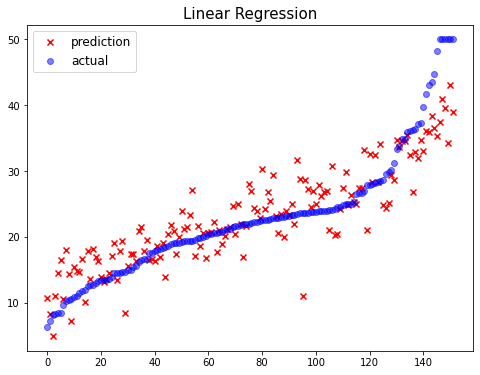

In [18]:
# 실제값과 예측값 그래프 출력: plot_pred_actual 함수 사용
plot_pred_actual(pred, y_test)

               model        mse
0  Linear regression  19.831324


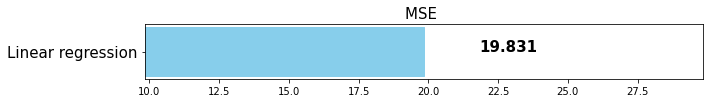

In [19]:
# MSE를 막대그래프로 출력(prediction에 저장된 모델명과 MSE를 출력하는 함수 mse_graph 사용)
add_msevalue('Linear regression', pred, y_test) # 예측값(pred)와 실데이터(y_test)의 MSE
mse_graph()

In [20]:
# 회귀 계수(W) 내림차순 조회(회귀 계수가 저장되어 있는 변수 coef_)

coeff = pd.Series(data=model.coef_, index=x_data.columns)
# 13개 feature의 회귀 계수(W)를 보기 편하게 하나의 열(Series)로 출력
# feature를 저장해놓은 x_data의 컬럼명을 index로 사용

sorted_values = coeff.sort_values(ascending=False)
sorted_values

RM          2.795814
CHAS        2.439560
RAD         0.307542
ZN          0.060784
INDUS       0.059172
B           0.006450
AGE         0.003575
TAX        -0.011280
CRIM       -0.098542
LSTAT      -0.568835
PTRATIO    -1.005466
DIS        -1.516272
NOX       -21.469965
dtype: float64

## 규제(Regularization) 선형 회귀

### Ridge Model (L2)
- L2 규제를 추가한 모형

In [21]:
from sklearn.linear_model import Ridge

In [22]:
# alpha 값이 커질수록 큰 규제
alphas = [0.01, 0.1, 1, 10, 100] # 하이퍼 파라미터 alpha 값 5개 지정

               model        mse
0   Ridge(alpha=100)  23.109414
1    Ridge(alpha=10)  19.881104
2  Linear regression  19.831324
3  Ridge(alpha=0.01)  19.815783
4   Ridge(alpha=0.1)  19.696200
5     Ridge(alpha=1)  19.334416


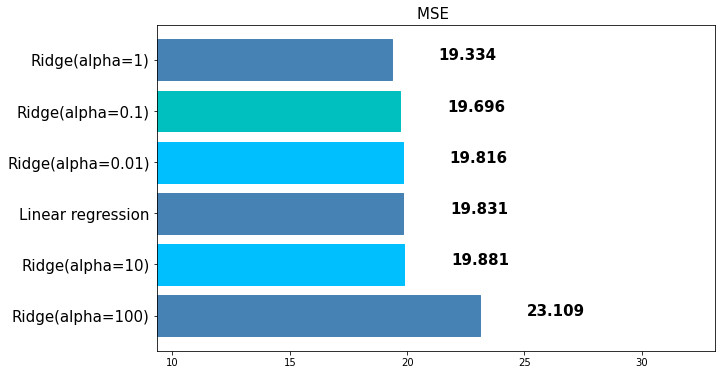

In [23]:
# alphas 값들을 for문에 넣어 5번의 학습과 예측을 수행
# 5개의 alpha 값에 따라 성능이 어떻게 달라지는지 확인

for alpha in alphas:
    
    # Ridge 알고리즘 객체 생성
    ridge = Ridge(alpha=alpha) # alpha: 모델의 alpha 값을 지정해주는 하이퍼 파라미터
    
    # 모델 학습
    ridge.fit(x_train, y_train)
    
    # 예측값 생성
    pred = ridge.predict(x_test)
    
    add_msevalue(f'Ridge(alpha={alpha})', pred, y_test)

mse_graph()

# alpha 값을 조정했을 때 규제 없는 모델에 비해 MSE 값이 작게 나온 경우 있는 것 확인 가능

In [24]:
# boston의 feature 데이터(x_data) 컬럼 조회
x_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

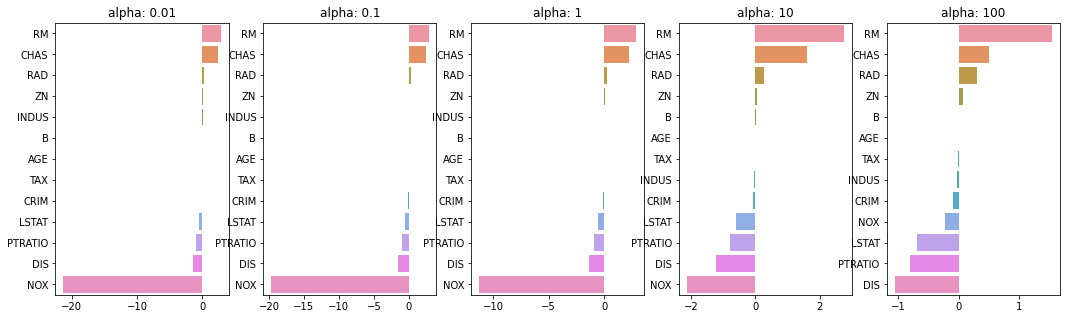

In [25]:
# 각 alpha 값의 Ridge 모델로 학습/예측한 회귀계수를 그래프로 출력

import matplotlib.pyplot as plt

coeff_df = pd.DataFrame() # 회귀계수를 담을 빈 데이터프레임 coeff_df 생성

fig, axes = plt.subplots(1, 5, figsize=(18, 5)) # 1행 5열 그래프

# alpha 값에 따른 회귀계수의 변화를 수평 barplot으로 출력
for idx, alpha in enumerate(alphas): # enumerate: list의 자료와 인덱스를 모두 가져오기
    
    # Ridge 모델 객체 생성 및 학습
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    
    # 회귀계수 Series로 저장(인덱스는 feature의 컬럼명)
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)

    col_name = 'alpha: ' + str(alpha)
    coeff_df[col_name] = coeff # 앞서 생성한 Series를 coeff_df에 'col_name' 컬럼으로 추가
    sorted_values = coeff.sort_values(ascending=False)
    axes[idx].set_title(col_name)
    sns.barplot(x=sorted_values, y=sorted_values.index, ax=axes[idx])
    # x는 회귀계수 값, y는 index(feature 컬럼명), 그래프는 alphas의 idx에 따라 순서대로 5개

In [30]:
coeff_df.sort_values(by='alpha: ' + str(alphas[0]), ascending=False)
# 앞서 생성한 'col_name' 컬럼들 중 첫 번째 컬럼(alpha: 0.01) 기준으로 행 내림차순 정렬

,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,2.797965,2.815508,2.896189,2.767564,1.551955
CHAS,2.436342,2.409210,2.234261,1.619124,0.508136
RAD,0.307077,0.303256,0.283653,0.272443,0.301903
ZN,0.060806,0.060990,0.062035,0.064209,0.067141
INDUS,0.058283,0.050949,0.012140,-0.028869,-0.032886
B,0.006462,0.006564,0.007098,0.007594,0.007044
AGE,0.003414,0.002089,-0.004815,-0.010168,0.001522
TAX,-0.011298,-0.011450,-0.012283,-0.013600,-0.014890
CRIM,-0.098377,-0.097016,-0.089935,-0.084331,-0.088438
LSTAT,-0.569026,-0.570625,-0.580034,-0.605912,-0.691520


###  Lasso Model (L1)
- L1 규제를 추가한 모형

In [31]:
from sklearn.linear_model import Lasso

In [32]:
# alpha 값 지정
alphas = [0.07, 0.1, 0.5, 1, 3]

# 앞서 도출한 MSE 값이 포함된 predictions 초기화: dictionary 비우는 메소드 clear()
# predictions.clear()

                model        mse
0      Lasso(alpha=3)  38.890689
1      Lasso(alpha=1)  30.293798
2    Lasso(alpha=0.5)  23.918883
3    Ridge(alpha=100)  23.109414
4    Lasso(alpha=0.1)  20.224717
5   Lasso(alpha=0.07)  19.950978
6     Ridge(alpha=10)  19.881104
7   Linear regression  19.831324
8   Ridge(alpha=0.01)  19.815783
9    Ridge(alpha=0.1)  19.696200
10     Ridge(alpha=1)  19.334416


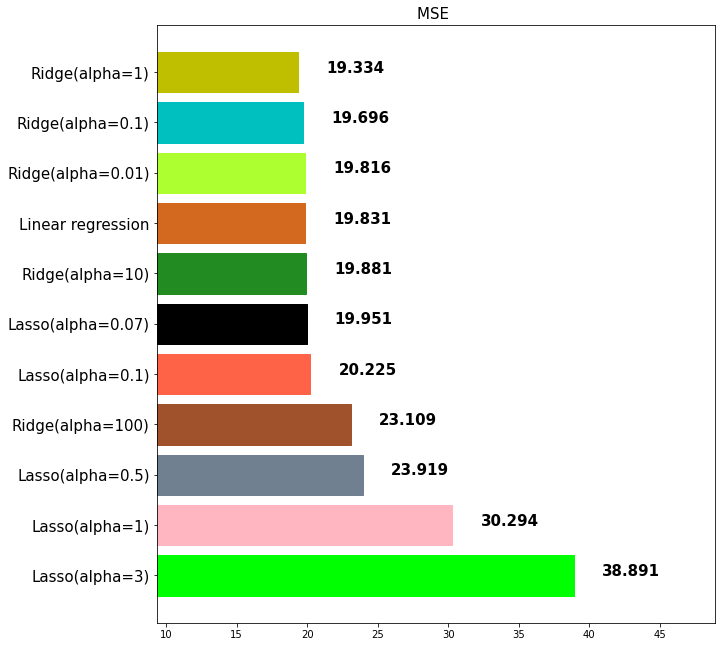

In [35]:
for alpha in alphas:
    
    # 알고리즘 객체 생성
    lasso = Lasso(alpha=alpha)
    
    # 모델 학습
    lasso.fit(x_train, y_train)

    # 예측값 생성
    pred = lasso.predict(x_test)

    add_msevalue(f'Lasso(alpha={alpha})', pred, y_test)
    
mse_graph()

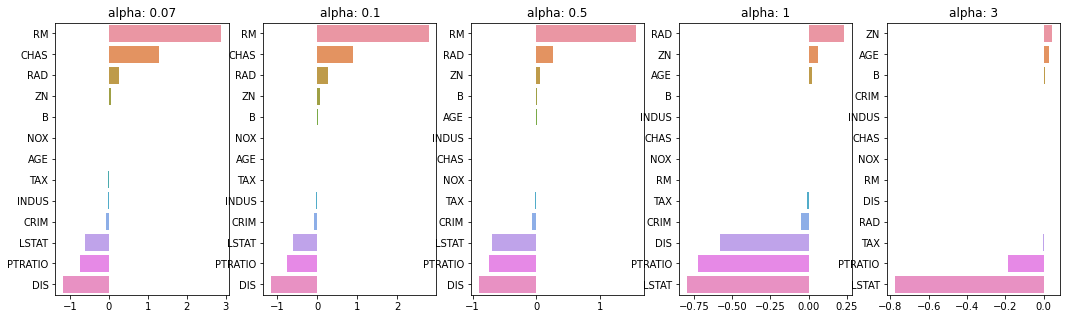

In [36]:
# 각 alpha 값에 따라 학습/예측한 Lasso 모델의 회귀계수를 그래프로 출력

import matplotlib.pyplot as plt

coeff_df = pd.DataFrame() # 회귀계수를 담을 빈 데이터프레임 생성

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for idx, alpha in enumerate(alphas):
    
    # Lasso 모델 객체 생성 및 학습
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    
    # 회귀계수 Series로 저장(인덱스는 feature의 컬럼)
    coeff = pd.Series(data=lasso.coef_, index=x_data.columns)
    
    col_name = 'alpha: ' + str(alpha)
    coeff_df[col_name] = coeff
    sorted_values = coeff.sort_values(ascending=False)
    axes[idx].set_title(col_name)
    sns.barplot(x=sorted_values, y=sorted_values.index, ax=axes[idx])

In [37]:
coeff_df.sort_values('alpha: ' + str(alphas[0]), ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,2.871824,2.788615,1.569403,0.000000,0.000000
CHAS,1.280680,0.894885,0.000000,0.000000,0.000000
RAD,0.262576,0.266413,0.261334,0.233009,0.000000
ZN,0.063581,0.063790,0.062473,0.059043,0.043782
B,0.007806,0.007795,0.007095,0.006003,0.004833
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
AGE,-0.011299,-0.009812,0.003097,0.019650,0.028517
TAX,-0.013826,-0.014079,-0.014023,-0.012307,-0.004115
INDUS,-0.030662,-0.026372,-0.000000,-0.000000,-0.000000
CRIM,-0.079820,-0.079892,-0.068740,-0.052568,-0.000000


### ElasticNet
- L1, L2 규제를 결합한 모형

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
ratios = [0.2, 0.5, 0.8]

# ElasticNet 모델의 경우 하이퍼 파라미터가 두 개 존재: alpha, l1_ratio
# 실습은 alpha 값을 0.5로 고정해놓고 ratio만 바꿔가면서 진행

                       model        mse
0             Lasso(alpha=3)  38.890689
1             Lasso(alpha=1)  30.293798
2   ElasticNet(l1_ratio=0.2)  24.552499
3   ElasticNet(l1_ratio=0.5)  24.509405
4   ElasticNet(l1_ratio=0.8)  24.286471
5           Lasso(alpha=0.5)  23.918883
6           Ridge(alpha=100)  23.109414
7           Lasso(alpha=0.1)  20.224717
8          Lasso(alpha=0.07)  19.950978
9            Ridge(alpha=10)  19.881104
10         Linear regression  19.831324
11         Ridge(alpha=0.01)  19.815783
12          Ridge(alpha=0.1)  19.696200
13            Ridge(alpha=1)  19.334416


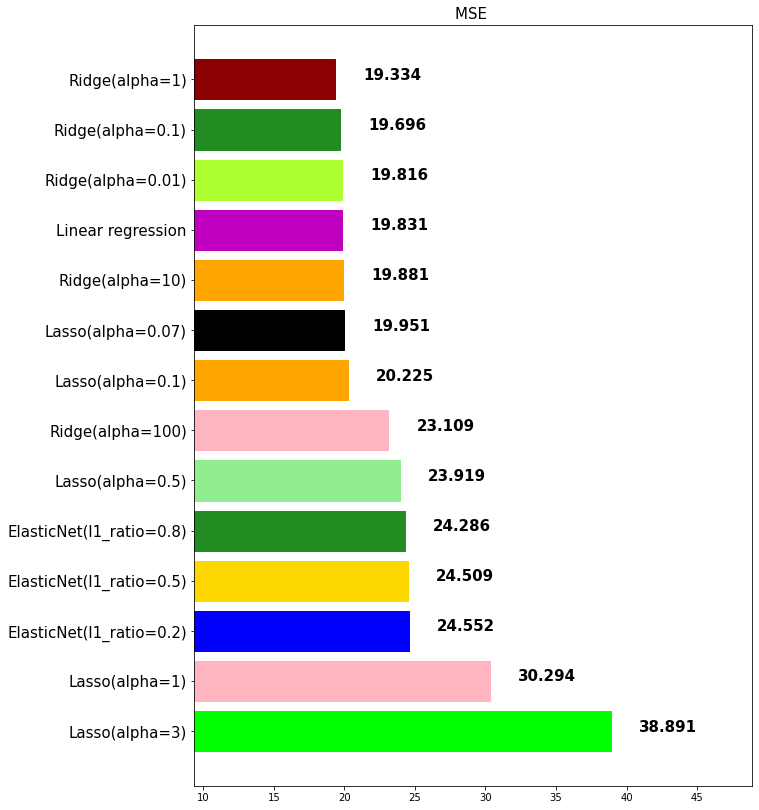

In [40]:
for ratio in ratios:
    
    # 알고리즘 객체 생성
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio) # l1_ratio를 바꿔가면서 확인
    
    # 모델 학습
    elasticnet.fit(x_train, y_train)
    
    # 예측값 생성
    pred = elasticnet.predict(x_test)
    
    add_msevalue(f'ElasticNet(l1_ratio={ratio})', pred, y_test)

mse_graph()

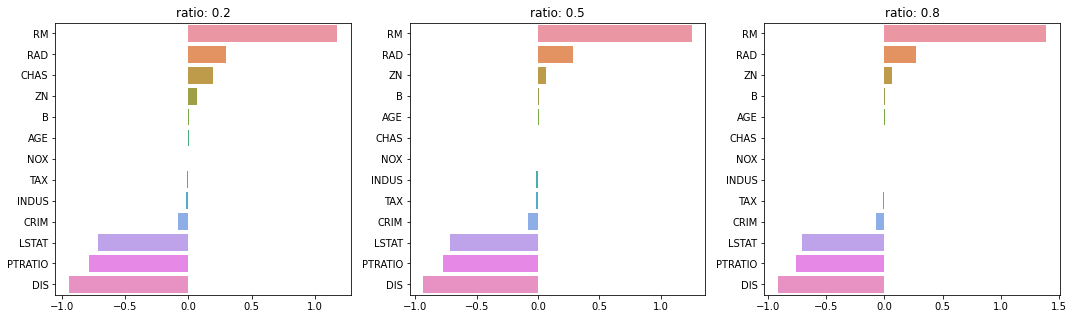

In [41]:
import matplotlib.pyplot as plt

coeff_df = pd.DataFrame()

fig, axes  = plt.subplots(1, 3, figsize=(18, 5)) # 1행 3열 그래프

for idx, ratio in enumerate(ratios):
    
    # ElasticNet 모델 객체 생성 및 학습
    elastic = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elastic.fit(x_train, y_train)
    
    # 회귀계수 Series로 저장(인덱스는 feature의 컬럼)
    coeff = pd.Series(data = elastic.coef_, index = x_data.columns)
    
    col_name = 'ratio: ' + str(ratio)
    coeff_df[col_name] = coeff
    sorted_values = coeff.sort_values(ascending=False)
    axes[idx].set_title(col_name)
    sns.barplot(x=sorted_values, y=sorted_values.index, ax=axes[idx])

In [42]:
coeff_df.sort_values('ratio: ' + str(ratios[0]), ascending=False)

,ratio: 0.2,ratio: 0.5,ratio: 0.8
RM,1.177359,1.254081,1.391643
RAD,0.298753,0.288948,0.274900
CHAS,0.193604,0.000000,0.000000
ZN,0.066260,0.065508,0.064172
B,0.006822,0.006903,0.006998
AGE,0.006673,0.005733,0.004343
NOX,-0.000000,-0.000000,-0.000000
TAX,-0.014901,-0.014782,-0.014476
INDUS,-0.023036,-0.012712,-0.002311
CRIM,-0.084774,-0.079572,-0.073286
